In [1]:
import pandas as pd
import yaml
import os

# Params
bw = 12
rtt = 20
bdp_mult = 0.2

In [2]:
# Load policies runs
path_to_csv = "/home/lorenzo/Desktop/mutant/log/collection/csv"
# Load protocol names from yaml file
path_to_yaml = "/home/lorenzo/Desktop/mutant/config/protocols.yml"
with open(path_to_yaml, 'r') as file:
    config = yaml.safe_load(file)

proto_dfs = {}
for proto, _ in config.items():
    # filename = f"{proto}.bw{bw}"
    print(proto)
    proto_filename = f"{proto}.bw{bw}.rtt{rtt}.bdp_mult{bdp_mult}.csv"
    df = pd.read_csv(os.path.join(path_to_csv, proto_filename))
    proto_dfs[proto] = df

cubic


NameError: name 'q_size' is not defined

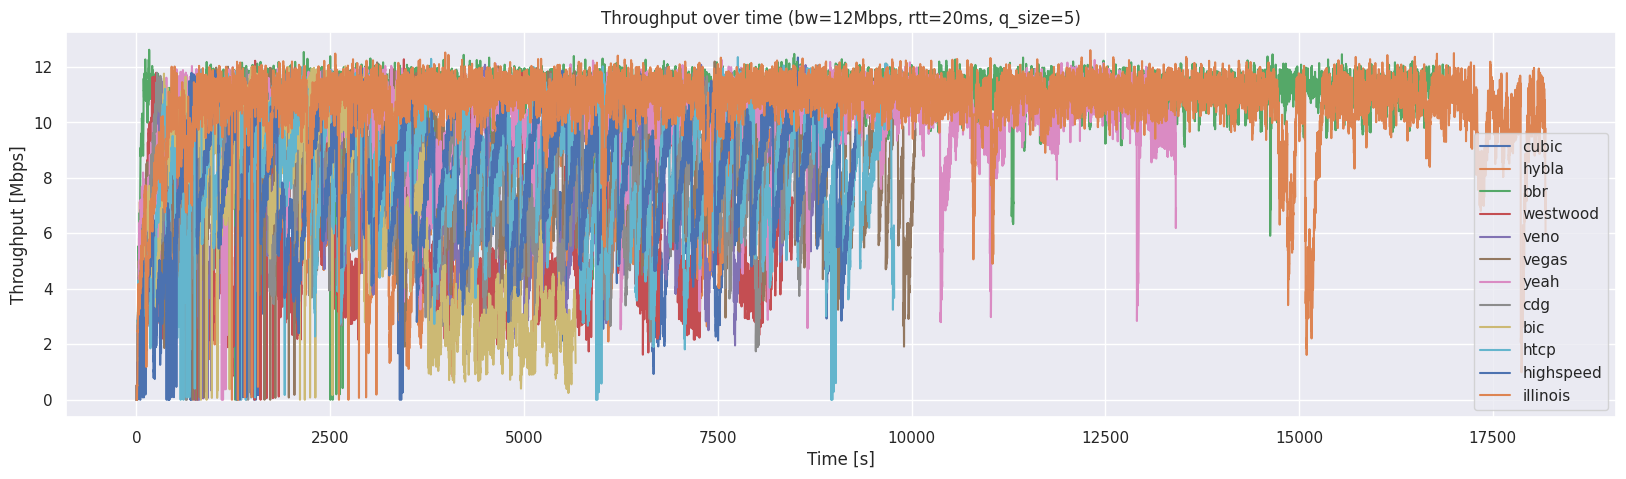

In [ ]:
# Plot the throughput over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 5))
cubic_df = proto_dfs["cubic"]
bbr_df = proto_dfs["bbr"]
for proto, df in proto_dfs.items():
    plt.plot(df["thruput"], label=proto)
# plt.plot(cubic_df["thruput"], label='cubic')
# plt.plot(bbr_df["thruput"], label='bbr')
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Throughput [Mbps]")
plt.title(f"Throughput over time (bw={bw}Mbps, rtt={rtt}ms, bdp_mult={bdp_mult})")
# plt.savefig(f"plots/throughput_over_time.bw{bw}.rtt{rtt}.bdp_mult{bdp_mult}.png")
plt.show()

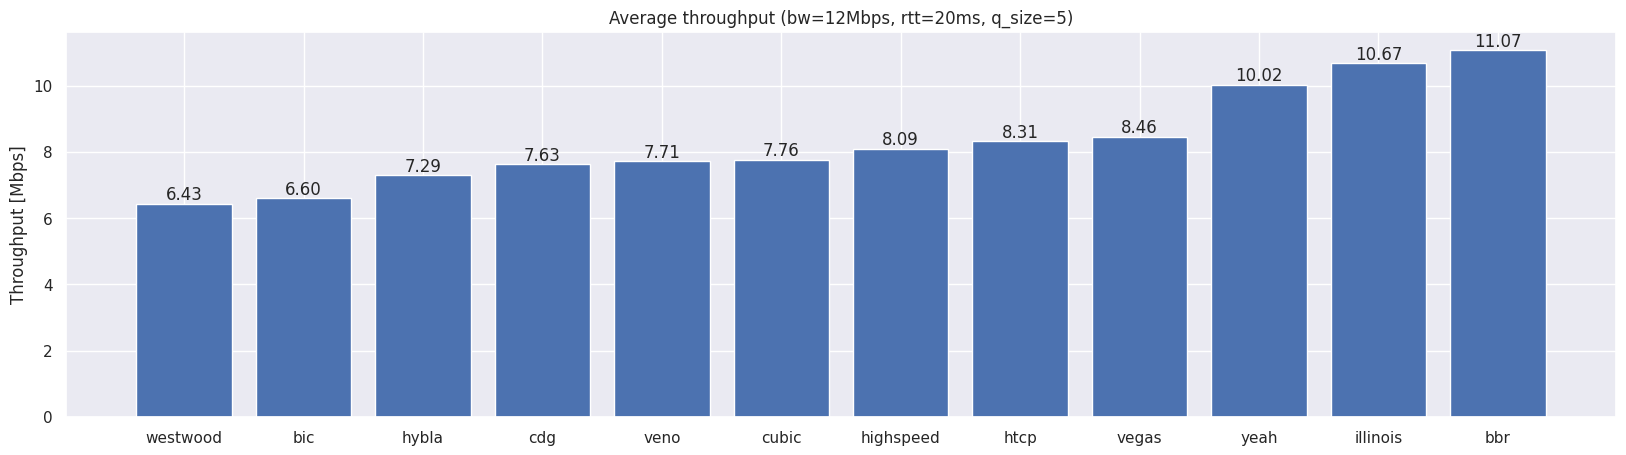

In [ ]:
# Plot the average throughput (sort the protocols by avg throughput)
# indicate the value on top of the bar
plt.figure(figsize=(20, 5))
avg_thruput = {}
for proto, df in proto_dfs.items():
    avg_thruput[proto] = df["thruput"].mean()
    avg_thruput = dict(sorted(avg_thruput.items(), key=lambda item: item[1]))
plt.bar(avg_thruput.keys(), avg_thruput.values())
for k, v in avg_thruput.items():
    plt.text(k, v, f"{v:.2f}", ha='center', va='bottom')
plt.ylabel("Throughput [Mbps]")
plt.title(f"Average throughput (bw={bw}Mbps, rtt={rtt}ms, bdp_mult={bdp_mult})")
# plt.savefig(f"plots/avg_throughput.bw{bw}.rtt{rtt}.bdp_mult{bdp_mult}.png")
plt.show()

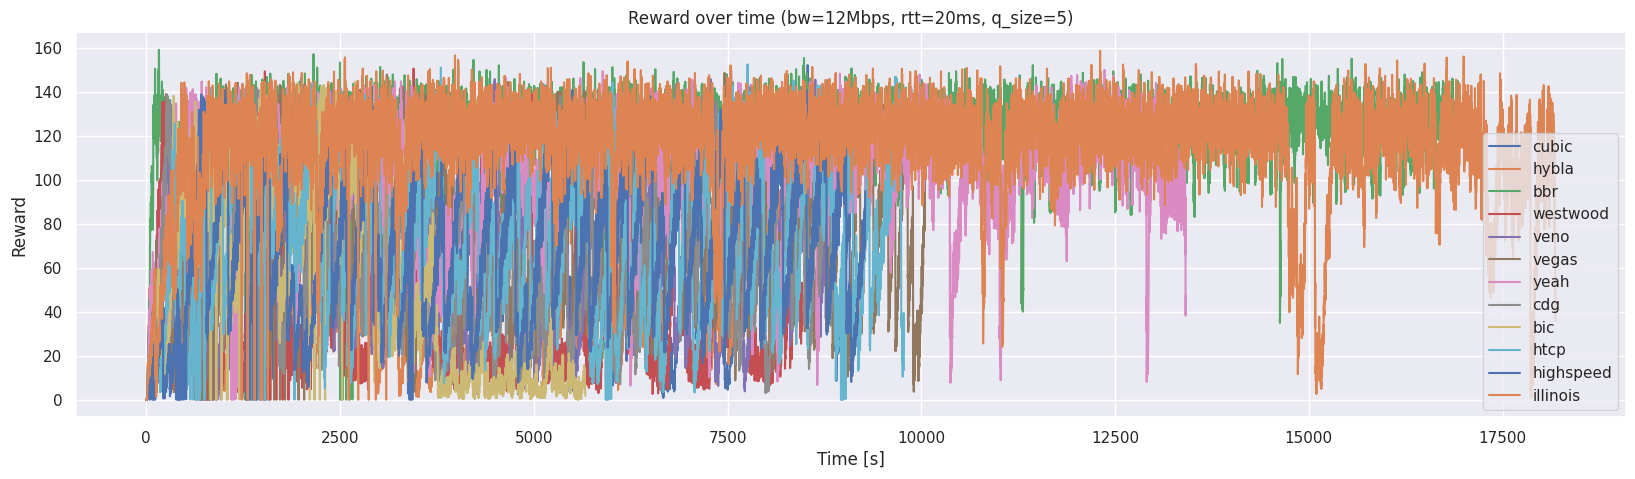

In [ ]:
# Plot the reward values over time
plt.figure(figsize=(20, 5))
for proto, df in proto_dfs.items():
    plt.plot(df["reward"], label=proto)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Reward")
plt.title(f"Reward over time (bw={bw}Mbps, rtt={rtt}ms, bdp_mult={bdp_mult})")
# plt.savefig(f"plots/reward_over_time.bw{bw}.rtt{rtt}.bdp_mult{bdp_mult}.png")
plt.show()

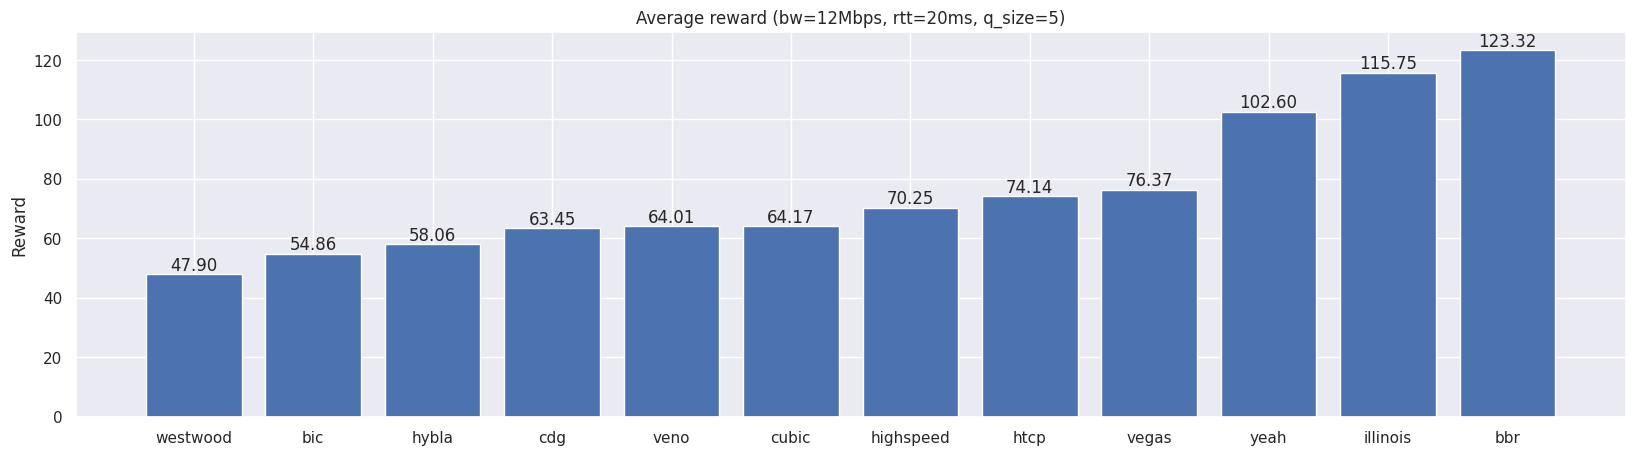

In [ ]:
# Plot the average reward (sort the protocols by avg reward)
# indicate the value on top of the bar
plt.figure(figsize=(20, 5))
avg_reward = {}
for proto, df in proto_dfs.items():
    avg_reward[proto] = df["reward"].mean()
    avg_reward = dict(sorted(avg_reward.items(), key=lambda item: item[1]))
plt.bar(avg_reward.keys(), avg_reward.values())
for k, v in avg_reward.items():
    plt.text(k, v, f"{v:.2f}", ha='center', va='bottom')
plt.ylabel("Reward")
plt.title(f"Average reward (bw={bw}Mbps, rtt={rtt}ms, bdp_mult={bdp_mult})")
# plt.savefig(f"plots/avg_reward.bw{bw}.rtt{rtt}.bdp_mult{q_size}.png")
plt.show()
